# Kaggle - nivel 1

## Primer Modelo - Regresión Logística

seguimos con la competición Titanic Challenge visto en el punto 1

rev. 04-16-2020

## Workflow stages
The competition solution workflow goes through seven stages described in the Data Science Solutions book.

1. Question or problem definition.
2. Acquire training and testing data.
3. Wrangle, prepare, cleanse the data.
4. Analyze, identify patterns, and explore the data.
5. Model, predict and solve the problem.
6. Visualize, report, and present the problem solving steps and final solution.
7. Supply or submit the results.

## Check the versions of libraries

In [1]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Dec 30 2019, 19:38:36) 
[Clang 10.0.0 (clang-1000.11.45.5)]
scipy: 1.4.1
numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


***

## Import Libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# data mining
#from sklearn.impute import KNNImputer, MissingIndicator, SimpleImputer
from sklearn import impute
from sklearn_pandas import categorical_imputer, CategoricalImputer
from sklearn.pipeline import make_pipeline, make_union
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# machine learning
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

## scikit modeling libraries
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)

## Load metrics for predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, rfe
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Save the model
import pickle
import joblib


## Warnings and other tools
import itertools
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.rfe module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection.rfe. Anything that cannot be imported from sklearn.feature_selection.rfe is now part of the private API.
  warnings.warn(message, FutureWarning)


***

## Load dataset

Kaggle we provide two datasets: train and test in csv extension. So, we check and analyze only train file.

In [3]:
# Load dataset train and test
train_titanic = pd.read_csv('train_titanic.csv')
test_titanic = pd.read_csv('test_titanic.csv')

In [4]:
train_titanic.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,0,3,True,1,0,S,2,0,A,False,N,r1,Student,Mr
1,1,1,False,1,0,C,2,0,D,True,C,r3,Adult,Mrs
2,1,3,False,0,0,S,1,1,B,False,N,r1,Young Adult,Miss
3,1,1,False,1,0,S,2,0,D,True,C,r4,Young Adult,Mrs
4,0,3,True,0,0,S,1,1,B,False,N,r1,Young Adult,Mr
5,0,3,True,0,0,Q,1,1,B,False,N,r1,Unknown,Mr
6,0,1,True,0,0,S,1,1,D,True,E,r1,Adult,Mr
7,0,3,True,3,1,S,5,0,C,False,N,r1,Baby,Master
8,1,3,False,0,2,S,3,0,B,False,N,r1,Young Adult,Mrs
9,1,2,False,1,0,C,2,0,C,False,N,r1,Teenager,Mrs


In [5]:
test_titanic.head(10)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,892,3,True,0,0,Q,1,1,A,False,N,r1,Student,Mr
1,893,3,False,1,0,S,2,0,A,False,N,r1,Adult,Mrs
2,894,2,True,0,0,Q,1,1,B,False,N,r1,Young Adult,Mr
3,895,3,True,0,0,S,1,1,B,False,N,r1,Young Adult,Mr
4,896,3,False,1,1,S,3,0,B,False,N,r1,Young Adult,Mrs
5,897,3,True,0,0,S,1,1,B,False,N,r1,Unknown,Mr
6,898,3,False,0,0,Q,1,1,A,False,N,r1,Adult,Miss
7,899,2,True,1,1,S,3,0,C,False,N,r1,Baby,Mr
8,900,3,False,0,0,C,1,1,A,False,N,r1,Young Adult,Mrs
9,901,3,True,2,0,S,3,0,C,False,N,r1,Teenager,Mr


* * *

### Training and Validation dataset

In [6]:
PassengerId = test_titanic['PassengerId']
X = train_titanic
Y = test_titanic.drop('PassengerId', axis=1).copy()

In [7]:
PassengerId

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [8]:
Y

,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,3,True,0,0,Q,1,1,A,False,N,r1,Student,Mr
1,3,False,1,0,S,2,0,A,False,N,r1,Adult,Mrs
2,2,True,0,0,Q,1,1,B,False,N,r1,Young Adult,Mr
3,3,True,0,0,S,1,1,B,False,N,r1,Young Adult,Mr
4,3,False,1,1,S,3,0,B,False,N,r1,Young Adult,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,True,0,0,S,1,1,B,False,N,r1,Unknown,Mr
414,1,False,0,0,C,1,1,D,True,C,r4,Adult,Rare
415,3,True,0,0,S,1,1,A,False,N,r1,Unknown,Mr
416,3,True,0,0,S,1,1,B,False,N,r1,Young Adult,Mr


* * *

## Scaling with StandardScaler

We made scaling by StandarScaler and evaluate results to first approach.
`SibSp`, `Parch`, `FamilySize`

In [9]:
dataset = [X, Y]

In [10]:
col_Z = ['SibSp', 'Parch', 'FamilySize']

In [11]:
features = dataset[0][col_Z]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [12]:
dataset[0][col_Z] = features
dataset[0].head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,0,3,True,0.432793,-0.473674,S,0.059160,0,A,False,N,r1,Student,Mr
1,1,1,False,0.432793,-0.473674,C,0.059160,0,D,True,C,r3,Adult,Mrs
2,1,3,False,-0.474545,-0.473674,S,-0.560975,1,B,False,N,r1,Young Adult,Miss
3,1,1,False,0.432793,-0.473674,S,0.059160,0,D,True,C,r4,Young Adult,Mrs
4,0,3,True,-0.474545,-0.473674,S,-0.560975,1,B,False,N,r1,Young Adult,Mr
5,0,3,True,-0.474545,-0.473674,Q,-0.560975,1,B,False,N,r1,Unknown,Mr
6,0,1,True,-0.474545,-0.473674,S,-0.560975,1,D,True,E,r1,Adult,Mr
7,0,3,True,2.247470,0.767630,S,1.919564,0,C,False,N,r1,Baby,Master
8,1,3,False,-0.474545,2.008933,S,0.679295,0,B,False,N,r1,Young Adult,Mrs
9,1,2,False,0.432793,-0.473674,C,0.059160,0,C,False,N,r1,Teenager,Mrs


In [13]:
features = dataset[1][col_Z]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [14]:
dataset[1][col_Z] = features
dataset[1].head(10)

,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,IsAlone,FareGroup,InCabin,Deck,RoomGroup,AgeGroup,Title
0,3,True,-0.499470,-0.400248,Q,-0.553443,1,A,False,N,r1,Student,Mr
1,3,False,0.616992,-0.400248,S,0.105643,0,A,False,N,r1,Adult,Mrs
2,2,True,-0.499470,-0.400248,Q,-0.553443,1,B,False,N,r1,Young Adult,Mr
3,3,True,-0.499470,-0.400248,S,-0.553443,1,B,False,N,r1,Young Adult,Mr
4,3,False,0.616992,0.619896,S,0.764728,0,B,False,N,r1,Young Adult,Mrs
5,3,True,-0.499470,-0.400248,S,-0.553443,1,B,False,N,r1,Unknown,Mr
6,3,False,-0.499470,-0.400248,Q,-0.553443,1,A,False,N,r1,Adult,Miss
7,2,True,0.616992,0.619896,S,0.764728,0,C,False,N,r1,Baby,Mr
8,3,False,-0.499470,-0.400248,C,-0.553443,1,A,False,N,r1,Young Adult,Mrs
9,3,True,1.733455,-0.400248,S,0.764728,0,C,False,N,r1,Teenager,Mr


## Binarizing categorical variables

De cada variable categórica haremos `m` variables binarias, donde `m` es el numero de categorías de la variable.

In [15]:
cols = ['Pclass', 'Embarked', 'FareGroup', 'AgeGroup', 'Title', 'Deck', 'RoomGroup']
titanic_categorical = dataset[0][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
titanic_categorical.head()
dataset[0] = pd.concat([dataset[0][dataset[0].columns[~dataset[0].columns.isin(cols)]], titanic_categorical], axis=1)
dataset[0].head()

,Survived,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,Deck_T,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,0,True,0.432793,-0.473674,0.059160,0,False,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [16]:
titanic_categorical = dataset[1][cols]
titanic_categorical = pd.concat([pd.get_dummies(titanic_categorical[col], prefix=col) for col in titanic_categorical], axis=1)
dataset[1] = pd.concat([dataset[1][dataset[1].columns[~dataset[1].columns.isin(cols)]], titanic_categorical], axis=1)
dataset[1].head()

,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,False,0.616992,-0.400248,0.105643,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
2,True,-0.499470,-0.400248,-0.553443,1,False,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,True,-0.499470,-0.400248,-0.553443,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
4,False,0.616992,0.619896,0.764728,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [17]:
# We remove Deck_T from dataset0
dataset[0].columns.tolist()

['Survived',
 'Sex',
 'SibSp',
 'Parch',
 'FamilySize',
 'IsAlone',
 'InCabin',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'FareGroup_A',
 'FareGroup_B',
 'FareGroup_C',
 'FareGroup_D',
 'AgeGroup_Adult',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Senior',
 'AgeGroup_Student',
 'AgeGroup_Teenager',
 'AgeGroup_Unknown',
 'AgeGroup_Young Adult',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_N',
 'Deck_T',
 'RoomGroup_r1',
 'RoomGroup_r2',
 'RoomGroup_r3',
 'RoomGroup_r4']

In [18]:
dataset[1].columns.tolist()

['Sex',
 'SibSp',
 'Parch',
 'FamilySize',
 'IsAlone',
 'InCabin',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'FareGroup_A',
 'FareGroup_B',
 'FareGroup_C',
 'FareGroup_D',
 'AgeGroup_Adult',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Senior',
 'AgeGroup_Student',
 'AgeGroup_Teenager',
 'AgeGroup_Unknown',
 'AgeGroup_Young Adult',
 'Title_Master',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_N',
 'RoomGroup_r1',
 'RoomGroup_r2',
 'RoomGroup_r3',
 'RoomGroup_r4']

In [19]:
dataset[0] = dataset[0].drop('Deck_T', axis=1).copy()

In [20]:
dataset[0]

,Survived,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,0,True,0.432793,-0.473674,0.059160,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,False,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,True,-0.474545,-0.473674,-0.560975,1,False,0,1,0,...,0,0,0,0,0,1,1,0,0,0
887,1,False,-0.474545,-0.473674,-0.560975,1,True,1,0,0,...,0,0,0,0,0,0,1,0,0,0
888,0,False,0.432793,2.008933,1.299429,0,False,0,0,1,...,0,0,0,0,0,1,1,0,0,0
889,1,True,-0.474545,-0.473674,-0.560975,1,True,1,0,0,...,1,0,0,0,0,0,0,0,0,1


In [21]:
dataset[0].dtypes

Survived                  int64
Sex                        bool
SibSp                   float64
Parch                   float64
FamilySize              float64
IsAlone                   int64
InCabin                    bool
Pclass_1                  uint8
Pclass_2                  uint8
Pclass_3                  uint8
Embarked_C                uint8
Embarked_Q                uint8
Embarked_S                uint8
FareGroup_A               uint8
FareGroup_B               uint8
FareGroup_C               uint8
FareGroup_D               uint8
AgeGroup_Adult            uint8
AgeGroup_Baby             uint8
AgeGroup_Child            uint8
AgeGroup_Senior           uint8
AgeGroup_Student          uint8
AgeGroup_Teenager         uint8
AgeGroup_Unknown          uint8
AgeGroup_Young Adult      uint8
Title_Master              uint8
Title_Miss                uint8
Title_Mr                  uint8
Title_Mrs                 uint8
Title_Rare                uint8
Deck_A                    uint8
Deck_B  

* * *

## Variable correlation


The `DataFrame.corr()` method displays the correlation (or relationship) between the columns. We’ll examine the correlations between the features and the target by Pearson, Kendall and Spearman

- What is Correlation?
- Test Dataset
- Covariance
- Pearson’s Correlation
- Spearman’s Correlation


In [22]:
# Sales correlation matrix
k = 16 #number of variables for heatmap
plt.figure(figsize=(20,10))
corrmat = dataset[0].corr(method='spearman')
# picking the top 15 correlated features
cols15 = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(dataset[0][cols15].values.T)
sns.set(font_scale=1.10)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 12}, 
                 yticklabels=cols15.values, 
                 xticklabels=cols15.values,
                 linewidths=.5).set_title("Spearman Correlation Matrix", y=1.05, size=15)
plt.show()

AttributeError: 'float' object has no attribute 'shape'

<Figure size 1440x720 with 0 Axes>

In [23]:
# Show 15 features with most correlation ratio - Pearson
corr = dataset[0].corr(method='pearson')
print (corr['Survived'].sort_values(ascending=False)[:15], '\n')
print (corr['Survived'].sort_values(ascending=False)[-5:])

Survived         1.000000
Title_Mrs        0.341994
Title_Miss       0.335636
InCabin          0.316912
Pclass_1         0.285904
FareGroup_D      0.233638
Deck_B           0.175095
Embarked_C       0.168240
Deck_D           0.150716
AgeGroup_Baby    0.150304
Deck_E           0.145321
Deck_C           0.114652
RoomGroup_r4     0.096760
Pclass_2         0.093349
RoomGroup_r3     0.089330
Name: Survived, dtype: float64 

FareGroup_A   -0.221610
Deck_N        -0.316912
Pclass_3      -0.322308
Sex           -0.543351
Title_Mr      -0.549199
Name: Survived, dtype: float64


In [24]:
# Show 15 features with most correlation ratio - Kendall
corr = dataset[0].corr(method='kendall')
print (corr['Survived'].sort_values(ascending=False)[:15], '\n')
print (corr['Survived'].sort_values(ascending=False)[-5:])

Survived         1.000000
Title_Mrs        0.341994
Title_Miss       0.335636
InCabin          0.316912
Pclass_1         0.285904
FareGroup_D      0.233638
Deck_B           0.175095
Embarked_C       0.168240
FamilySize       0.154863
Deck_D           0.150716
AgeGroup_Baby    0.150304
Deck_E           0.145321
Parch            0.133933
Deck_C           0.114652
RoomGroup_r4     0.096760
Name: Survived, dtype: float64 

FareGroup_A   -0.221610
Deck_N        -0.316912
Pclass_3      -0.322308
Sex           -0.543351
Title_Mr      -0.549199
Name: Survived, dtype: float64


In [25]:
# Show 15 features with most correlation ratio - Spearman
corr = dataset[0].corr(method='spearman')
print (corr['Survived'].sort_values(ascending=False)[:15], '\n')
print (corr['Survived'].sort_values(ascending=False)[-5:])

Survived         1.000000
Title_Mrs        0.341994
Title_Miss       0.335636
InCabin          0.316912
Pclass_1         0.285904
FareGroup_D      0.233638
Deck_B           0.175095
Embarked_C       0.168240
FamilySize       0.165463
Deck_D           0.150716
AgeGroup_Baby    0.150304
Deck_E           0.145321
Parch            0.138266
Deck_C           0.114652
RoomGroup_r4     0.096760
Name: Survived, dtype: float64 

FareGroup_A   -0.221610
Deck_N        -0.316912
Pclass_3      -0.322308
Sex           -0.543351
Title_Mr      -0.549199
Name: Survived, dtype: float64


* * *
## Features selection

> Compared with the `second dataset` we try to remove features related with Sales and choose another ones.


## <a id='5.3'>5.3. Recursive Feature Elimination</a>
Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [29]:
X_feat = dataset[0].drop('Survived', axis=1).copy()
y_feat = dataset[0]['Survived']

In [30]:
X_feat

,Sex,SibSp,Parch,FamilySize,IsAlone,InCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,...,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_N,RoomGroup_r1,RoomGroup_r2,RoomGroup_r3,RoomGroup_r4
0,True,0.432793,-0.473674,0.059160,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,False,0.432793,-0.473674,0.059160,0,True,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2,False,-0.474545,-0.473674,-0.560975,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
3,False,0.432793,-0.473674,0.059160,0,True,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,True,-0.474545,-0.473674,-0.560975,1,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,True,-0.474545,-0.473674,-0.560975,1,False,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
887,False,-0.474545,-0.473674,-0.560975,1,True,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
888,False,0.432793,2.008933,1.299429,0,False,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
889,True,-0.474545,-0.473674,-0.560975,1,True,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [31]:
features = X_feat.columns.tolist()

In [185]:
# Get k
n = 17

# Create model by Logistic Regression and calculate RMSE
lr = LogisticRegression(n_jobs=4, verbose=2)
rfe = RFE(lr, n, verbose=2, )
rfe = rfe.fit(X_feat, y_feat.values.ravel())

Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:   

Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.


[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


In [186]:
rfe.estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [187]:
rfe.n_features_

17

In [188]:
# Print Support and Ranking
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True False  True False False  True False False False
  True  True False False  True  True False  True False False False False
  True False  True  True  True False  True False  True  True False  True
 False False False False False]
[ 1  7 18  1  8  1  9 10  1 16 17  2  1  1 19  4  1  1 12  1 22 21 15  6
  1 11  1  1  1 23  1 14  1  1 20  1  3 24 25  5 13]


In [189]:
z=zip(features, rfe.support_, rfe.ranking_)
list(z)

[('Sex', True, 1),
 ('SibSp', False, 7),
 ('Parch', False, 18),
 ('FamilySize', True, 1),
 ('IsAlone', False, 8),
 ('InCabin', True, 1),
 ('Pclass_1', False, 9),
 ('Pclass_2', False, 10),
 ('Pclass_3', True, 1),
 ('Embarked_C', False, 16),
 ('Embarked_Q', False, 17),
 ('Embarked_S', False, 2),
 ('FareGroup_A', True, 1),
 ('FareGroup_B', True, 1),
 ('FareGroup_C', False, 19),
 ('FareGroup_D', False, 4),
 ('AgeGroup_Adult', True, 1),
 ('AgeGroup_Baby', True, 1),
 ('AgeGroup_Child', False, 12),
 ('AgeGroup_Senior', True, 1),
 ('AgeGroup_Student', False, 22),
 ('AgeGroup_Teenager', False, 21),
 ('AgeGroup_Unknown', False, 15),
 ('AgeGroup_Young Adult', False, 6),
 ('Title_Master', True, 1),
 ('Title_Miss', False, 11),
 ('Title_Mr', True, 1),
 ('Title_Mrs', True, 1),
 ('Title_Rare', True, 1),
 ('Deck_A', False, 23),
 ('Deck_B', True, 1),
 ('Deck_C', False, 14),
 ('Deck_D', True, 1),
 ('Deck_E', True, 1),
 ('Deck_F', False, 20),
 ('Deck_G', True, 1),
 ('Deck_N', False, 3),
 ('RoomGroup_r1', 

In [190]:
colsRNK10 = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if r >=1 and r <=10:
        colsRNK10.append(v)

In [191]:
colsRNK15 = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if r >=1 and r <=15:
        colsRNK15.append(v)

In [192]:
colsRNK20 = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if r >=1 and r <=20:
        colsRNK20.append(v)

In [193]:
colsSPT = []
for v, s, r in zip(features, rfe.support_, rfe.ranking_):
    if s == True:
        colsSPT.append(v)

In [194]:
print(len(colsRNK10)) # Are the features selected by Ranking10
print(len(colsRNK15)) # Are the features selected by Ranking15
print(len(colsRNK20)) # Are the features selected by Ranking20

print(len(colsSPT)) # Are the features selected by Support

26
31
36
17


In [195]:
# Show all Features selected
print(cols5)
print("*-*"*20)
print(cols15)
print("*-*"*20)
print(cols25)
print("*-*"*20)
print(colsRNK10)
print("*-*"*20)
print(colsRNK15)
print("*-*"*20)
print(colsRNK20)
print("*-*"*20)
print(colsSPT)

Index(['Title_Mrs', 'Title_Miss', 'InCabin', 'Pclass_1', 'FareGroup_D'], dtype='object')
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Index(['Title_Mrs', 'Title_Miss', 'InCabin', 'Pclass_1', 'FareGroup_D',
       'Deck_B', 'Embarked_C', 'FamilySize', 'Deck_D', 'AgeGroup_Baby',
       'Deck_E', 'Parch', 'Deck_C', 'RoomGroup_r4', 'Pclass_2'],
      dtype='object')
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Index(['Title_Mrs', 'Title_Miss', 'InCabin', 'Pclass_1', 'FareGroup_D',
       'Deck_B', 'Embarked_C', 'FamilySize', 'Deck_D', 'AgeGroup_Baby',
       'Deck_E', 'Parch', 'Deck_C', 'RoomGroup_r4', 'Pclass_2', 'RoomGroup_r3',
       'SibSp', 'Title_Master', 'FareGroup_C', 'RoomGroup_r2', 'Deck_F',
       'AgeGroup_Teenager', 'AgeGroup_Young Adult', 'Deck_A',
       'AgeGroup_Adult'],
      dtype='object')
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
['Sex', 'SibSp', 'FamilySize', 'IsAlone', 'InCabin', 'Pclass_1', 'Pclass_2', 'Pclass_3', '

In [196]:
cols5 = cols5.drop('Survived')
cols15 = cols15.drop('Survived')
cols25 = cols25.drop('Survived')

KeyError: "['Survived'] not found in axis"

* * *

## Train and Test data

Dividimos los datos en dos conjuntos, de entrenamiento y de test. Con el conjunto de entrenamiento crearemos el modelo predictivo, y con el de test, lo evaluaremos para ver qué rendimiento tiene.

## Predictive Modeling

[Classification](https://en.wikipedia.org/wiki/Statistical_classification) problems are one of the most common in machine learning. This is [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning), that is, algorithms that, based on a set of tagged data, generalize a model that makes the most accurate prediction of the tag in a new set of data of the same type.

In this activity we will focus on showing different measures that we can use to evaluate a classification model.



### Logistic Regression

In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1 and the sum adding to one.

source [wikipedia - Logistic Regression](https://en.wikipedia.org/wiki/Logistic_regression)

### `Cols15`

In [197]:
# Split and drop Survived variable
X_cols15 = dataset[0][cols15]
Y = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_cols15, Y, test_size=0.20, random_state=42)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [198]:
X_train.head()

,Title_Mrs,Title_Miss,InCabin,Pclass_1,FareGroup_D,Deck_B,Embarked_C,FamilySize,Deck_D,AgeGroup_Baby,Deck_E,Parch,Deck_C,RoomGroup_r4,Pclass_2
331,0,0,True,1,0,0,0,-0.560975,0,0,0,-0.473674,1,1,0
733,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,1
382,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,0
704,0,0,False,0,0,0,0,0.059160,0,0,0,-0.473674,0,0,0
813,0,1,False,0,1,0,0,3.159833,0,0,0,2.008933,0,0,0


In [199]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [200]:
X_test.head()

,Title_Mrs,Title_Miss,InCabin,Pclass_1,FareGroup_D,Deck_B,Embarked_C,FamilySize,Deck_D,AgeGroup_Baby,Deck_E,Parch,Deck_C,RoomGroup_r4,Pclass_2
709,0,0,False,0,0,0,1,0.679295,0,0,0,0.767630,0,0,0
439,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,1
840,0,0,False,0,0,0,0,-0.560975,0,0,0,-0.473674,0,0,0
720,0,1,False,0,1,0,0,0.059160,0,0,0,0.767630,0,0,1
39,0,1,False,0,0,0,1,0.059160,0,0,0,-0.473674,0,0,0


In [201]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [202]:
# Create a performance_auc dict
performance_auc = {}

In [203]:
model1 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model1

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [204]:
predicted_log1 = model1.predict(X_test)
predicted_log1

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1])

In [205]:
# Confidence score
logreg_score1 = round(model1.score(X_train,y_train) * 100, 2)

print(logreg_score1)

print(classification_report(y_test, predicted_log1))

83.43
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       105
           1       0.71      0.70      0.71        74

    accuracy                           0.76       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.76      0.76       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

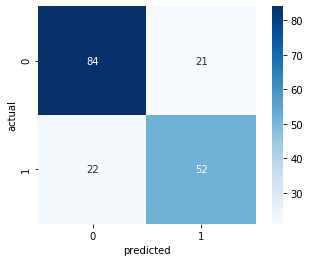

In [206]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log1)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

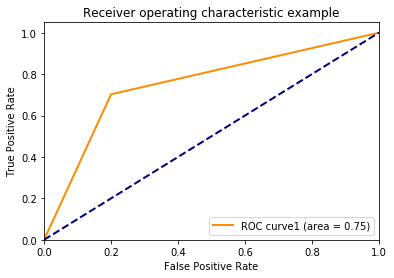

In [207]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log1)
roc_auc1 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc1

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve1 (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `ColsRNK10`

In [208]:
# Split and drop Survived variable
X_colsRNK = dataset[0][colsRNK10]
Y = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_colsRNK, Y, test_size=0.20, random_state=42)

In [209]:
model2 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model2

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [210]:
# Confidence score
logreg_score2 = round(model2.score(X_train,y_train) * 100, 2)
print(logreg_score2)

84.83


In [211]:
predicted_log2 = model2.predict(X_test)
predicted_log2

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [212]:
print(classification_report(y_test, predicted_log2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

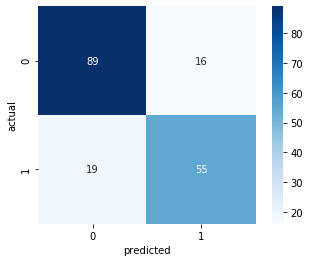

In [213]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log2)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

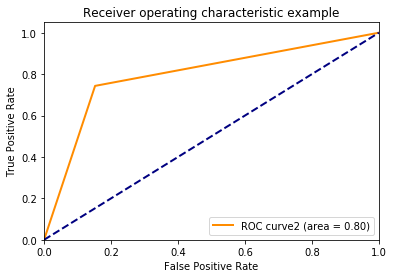

In [214]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log2)
roc_auc2 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc2

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `ColsRNK15`

In [215]:
# Split and drop Survived variable
X_colsRNK = dataset[0][colsRNK15]
Y = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_colsRNK, Y, test_size=0.20, random_state=42)

In [216]:
model2 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model2

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [217]:
# Confidence score
logreg_score2 = round(model2.score(X_train,y_train) * 100, 2)
print(logreg_score2)

84.69


In [218]:
predicted_log2 = model2.predict(X_test)
predicted_log2

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [219]:
print(classification_report(y_test, predicted_log2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

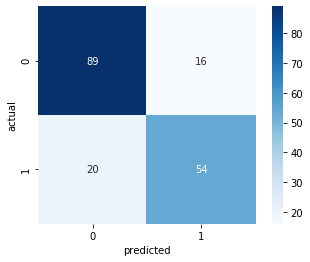

In [220]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log2)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

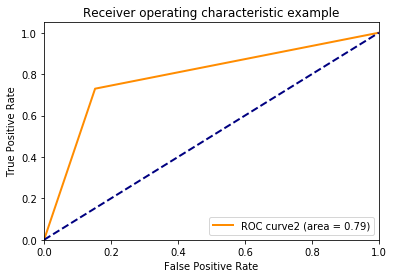

In [221]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log2)
roc_auc2 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc2

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `ColsRNK20`

In [222]:
# Split and drop Survived variable
X_colsRNK = dataset[0][colsRNK20]
Y = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_colsRNK, Y, test_size=0.20, random_state=42)

In [223]:
model2 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model2

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [224]:
# Confidence score
logreg_score2 = round(model2.score(X_train,y_train) * 100, 2)
print(logreg_score2)

84.69


In [225]:
predicted_log2 = model2.predict(X_test)
predicted_log2

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [226]:
print(classification_report(y_test, predicted_log2))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

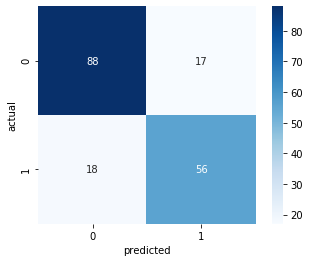

In [227]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log2)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

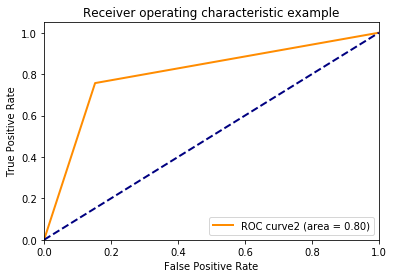

In [177]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log2)
roc_auc2 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc2

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve2 (area = %0.2f)' % roc_auc2)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `ColsSPT`

In [228]:
# Split and drop Survived variable
X_colsSPT = dataset[0][colsSPT]
Y = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_colsSPT, Y, test_size=0.20, random_state=42)

In [229]:
model3 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model3

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [230]:
# Confidence score
logreg_score3 = round(model3.score(X_train,y_train) * 100, 2)
print(logreg_score3)

84.13


In [231]:
predicted_log3 = model3.predict(X_test)
predicted_log3

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [232]:
print(classification_report(y_test, predicted_log3))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

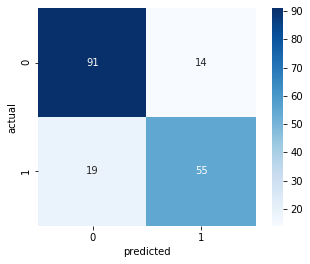

In [233]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log3)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

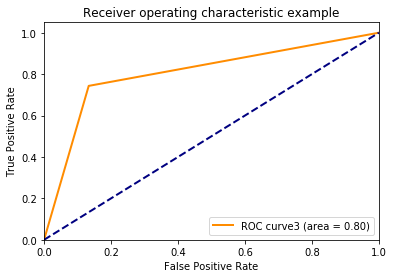

In [234]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log3)
roc_auc3 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc3

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve3 (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `Cols25`

In [235]:
# Split and drop Survived variable
X_cols25 = dataset[0][cols25]
Y = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_cols25, Y, test_size=0.20, random_state=42)

In [236]:
model4 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model4

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [237]:
# Confidence score
logreg_score4 = round(model4.score(X_train,y_train) * 100, 2)
print(logreg_score4)

83.99


In [238]:
predicted_log4 = model4.predict(X_test)
predicted_log4

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [239]:
print(classification_report(y_test, predicted_log4))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

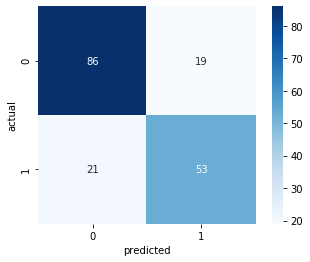

In [240]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log4)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

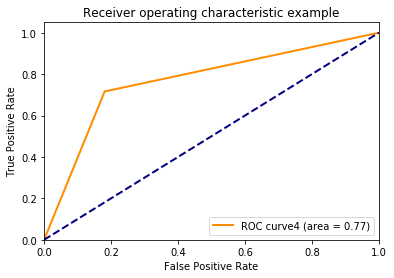

In [241]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log4)
roc_auc4 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc4

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve4 (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### `Cols5`

In [242]:
# Split and drop Survived variable
X_cols5 = dataset[0][cols5]
Y = dataset[0]['Survived']

# Create train and test 80-20 with seed fixed to 42
X_train, X_test, y_train, y_test = train_test_split(X_cols5, Y, test_size=0.20, random_state=42)

In [243]:
model5 = LogisticRegression(verbose=2,n_jobs=4).fit(X_train, y_train)
model5

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=2,
                   warm_start=False)

In [244]:
# Confidence score
logreg_score5 = round(model5.score(X_train,y_train) * 100, 2)
print(logreg_score5)

78.51


In [245]:
predicted_log5 = model5.predict(X_test)
predicted_log5

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1])

In [246]:
print(classification_report(y_test, predicted_log5))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

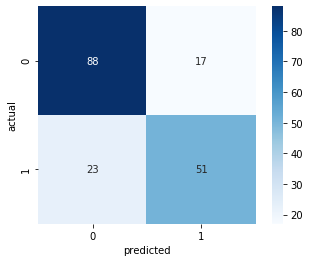

In [247]:
# Create a confusion matrix
matrix = confusion_matrix(y_test, predicted_log5)
sns.heatmap(matrix, annot=True, fmt="d", cmap='Blues', square=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt

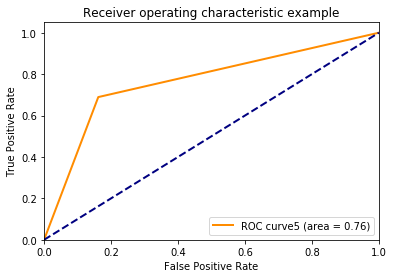

In [248]:
# Visualize results by ROC graph
fpr, tpr, thresholds = roc_curve(y_test, predicted_log5)
roc_auc5 = auc(fpr, tpr)
performance_auc['Logistic Regression'] = roc_auc5

# Plotting
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve5 (area = %0.2f)' % roc_auc5)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Conclusion and Model Evaluation

Después de aplicar diferentes modelos de clasificación, y viendo que no hay demasiadas diferencias de rendimiento entre ellos, el que mejor resultado nos ha dado con la métrica que hemos escogido ha sido el de Support Vector Machines.


In [ ]:
perf = pd.DataFrame.from_dict(performance_auc, orient='index')
perf['Model'] = perf.index
perf['AUC'] = perf[0]
plt.xlabel('AUC')
plt.title('Classifier AUC')
sns.set_color_codes("muted")
sns.barplot(x='AUC', y='Model', data=perf, color="b")

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree'],
    'Score': [svm_score, 
              knn_score, 
              logreg_score, 
              randfor_score,
              dectree_score ]})
models.sort_values(by='Score', ascending=False)

* * * 

## Validation with Logistic Regression colsSPT

In [251]:
# Testing with Logistic Regression
X_val = dataset[1][colsSPT]
predicted_LR = model3.predict(X_val)

In [252]:
len(predicted_LR)

418

* * * 

## Kaggle Submission

https://github.com/Kaggle/kaggle-api

In [256]:
#!pip install kaggle

     |████████████████████████████████| 58 kB 2.4 MB/s eta 0:00:011
     |████████████████████████████████| 118 kB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 6.8 MB/s eta 0:00:011
     |████████████████████████████████| 78 kB 11.5 MB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72857 sha256=d580a096d30e7ee980f35552fe832bebf20be3fd9bb7044e415dfaf72b4dd69a
  Stored in directory: /Users/marcusrb/Library/Caches/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
  Created wheel for python-slugify: filename=python_slugify-4.0.0-py2.py3-none-any.whl size=5487 sha256=9a8798a4e008667c84d6786110b98327d89ff780799b4077192dc98edc32b895
  Stored in directory: /Users/marcusrb/Library/Caches/pip/wheels/7c/26/30/5f3d95da00fe94d0c4a5ec5b4ffd2e1ae18545f5fa61752e52
Successfully built kaggle python-slugify
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.25.8
    Uninstalling urllib3-1.25.8:
     

In [264]:
#mkdir ~/.kaggle

mkdir: /Users/marcusrb/.kaggle: File exists


In [291]:
#mv kaggle.json ~/.kaggle/kaggle.json

In [292]:
#!chmod 600 ~/.kaggle/kaggle.json

In [293]:
import kaggle

In [294]:
!kaggle competitions -h

usage: kaggle competitions [-h]
                           {list,files,download,submit,submissions,leaderboard}
                           ...

optional arguments:
  -h, --help            show this help message and exit

commands:
  {list,files,download,submit,submissions,leaderboard}
    list                List available competitions
    files               List competition files
    download            Download competition files
    submit              Make a new competition submission
    submissions         Show your competition submissions
    leaderboard         Get competition leaderboard information


In [295]:
!kaggle competitions list --category gettingStarted

ref                                          deadline             category            reward  teamCount  userHasEntered  
-------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                             2030-01-01 00:00:00  Getting Started  Knowledge       2367           False  
titanic                                      2030-01-01 00:00:00  Getting Started  Knowledge      17930            True  
house-prices-advanced-regression-techniques  2030-01-01 00:00:00  Getting Started  Knowledge       4500            True  
connectx                                     2030-01-01 00:00:00  Getting Started  Knowledge        307           False  
nlp-getting-started                          2030-01-01 00:00:00  Getting Started      Kudos       2912           False  
facial-keypoints-detection                   2017-01-07 00:00:00  Getting Started  Knowledge        175           False  
street-view-getting-star

In [297]:
!kaggle competitions list -s titanic

ref      deadline             category            reward  teamCount  userHasEntered  
-------  -------------------  ---------------  ---------  ---------  --------------  
titanic  2030-01-01 00:00:00  Getting Started  Knowledge      17930            True  


In [301]:
!kaggle competitions leaderboard -s titanic

 teamId  teamName             submissionDate       score    
-------  -------------------  -------------------  -------  
3974022  Sen Wang96           2020-02-13 05:08:46  1.00000  
4385440  nsmnsm               2020-02-13 08:21:49  1.00000  
4369276  HIFIVE123            2020-02-13 09:22:20  1.00000  
4388491  Prince Kaushik       2020-02-13 18:11:41  1.00000  
2815151  edencfc              2020-02-14 03:57:46  1.00000  
4361307  KHA                  2020-02-15 21:16:47  1.00000  
 662934  Bayo Adekanmbi       2020-03-16 18:43:02  1.00000  
2820754  predictor!           2020-02-16 09:27:56  1.00000  
4400746  Suman Kumar Suman    2020-02-18 17:17:38  1.00000  
2720415  [Deleted]            2020-02-19 07:11:12  1.00000  
4422504  Y+Yamakawa           2020-02-20 02:47:39  1.00000  
4350883  kkungdaa             2020-02-20 08:24:46  1.00000  
4405422  HHHHH #2             2020-02-24 09:05:34  1.00000  
3548828  bonaventure muia     2020-03-23 21:20:24  1.00000  
3235022  lsfszyf        

In [303]:
!kaggle competitions submissions titanic

fileName                      date                 description                                  status    publicScore  privateScore  
----------------------------  -------------------  -------------------------------------------  --------  -----------  ------------  
evaluation_submission_nn.csv  2020-03-31 17:32:19  submit NN results                            complete  0.22966      None          
k_neighbours.csv              2020-03-07 16:54:01  test                                         complete  0.77511      None          
titanic_model_15.csv          2020-02-17 20:35:24  first 1.5a                                   complete  0.77511      None          
titanic_model_15.csv          2020-02-17 19:40:57  version 1.5                                  complete  0.00000      None          
titanic_model.csv             2020-02-03 20:35:09  Voting Predictor with 18 features            complete  0.77990      None          
titanic_model.csv             2020-02-02 18:11:45  Version Vot

In [253]:
# We submit predicted random forest results
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": predicted_LR
    })
submission.to_csv('submission_LR.csv', index=False)

In [304]:
pd.read_csv("submission_LR.csv")

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [306]:
!kaggle competitions submit titanic -f submission_LR.csv -m "LogisticRegression colsSPT"

100%|████████████████████████████████████████| 2.77k/2.77k [00:04<00:00, 684B/s]
Successfully submitted to Titanic: Machine Learning from Disaster

In [311]:
!kaggle competitions submissions titanic

fileName                      date                 description                                  status    publicScore  privateScore  
----------------------------  -------------------  -------------------------------------------  --------  -----------  ------------  
submission_LR.csv             2020-04-12 13:37:57  LogisticRegression colsSPT                   pending   None         None          
evaluation_submission_nn.csv  2020-03-31 17:32:19  submit NN results                            complete  0.22966      None          
k_neighbours.csv              2020-03-07 16:54:01  test                                         complete  0.77511      None          
titanic_model_15.csv          2020-02-17 20:35:24  first 1.5a                                   complete  0.77511      None          
titanic_model_15.csv          2020-02-17 19:40:57  version 1.5                                  complete  0.00000      None          
titanic_model.csv             2020-02-03 20:35:09  Voting Pred